In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

%matplotlib inline
%config Completer.use_jedi = False

In [48]:
# read data file

df = pd.read_csv('radars.csv')
df

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,15,...,20.6,3,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches
1,2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
2,3,Che Adams\Che-Adams,eng ENG,FW,Southampton,24-232,1996,21.2,4,40,...,13.5,0,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches
3,4,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,23-159,1997,22.0,0,17,...,9.0,0,0,0,0.9,0.9,0.06,-0.9,-0.9,Matches
4,5,Adrián\Adrian,es ESP,GK,Liverpool,34-058,1987,3.0,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,501,Andi Zeqiri\Andi-Zeqiri,ch SUI,FWDF,Brighton,21-253,1999,0.8,0,5,...,12.9,0,0,0,0.3,0.3,0.06,-0.3,-0.3,Matches
501,502,Oleksandr Zinchenko\Oleksandr-Zinchenko,ua UKR,DF,Manchester City,24-077,1996,10.1,0,8,...,21.1,0,0,0,0.4,0.4,0.06,-0.4,-0.4,Matches
502,503,Hakim Ziyech\Hakim-Ziyech,ma MAR,FWMF,Chelsea,27-348,1993,8.0,1,22,...,22.2,0,0,0,1.0,1.0,0.05,0.0,0.0,Matches
503,504,Kurt Zouma\Kurt-Zouma,fr FRA,DF,Chelsea,26-126,1994,16.0,4,15,...,10.8,0,0,0,1.0,1.0,0.07,3.0,3.0,Matches


In [7]:
# select goal keepers
gk = df[df['Pos'] == 'GK']
gk['Player'] = gk['Player'].str.split('\\',expand = True)[0]


<ipython-input-7-2ce7f1181777>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gk['Player'] = gk['Player'].str.split('\\',expand = True)[0]


In [9]:
#compare only 2 keepers
gk = gk[(gk['Player'] == 'Alisson') | (gk['Player'] == 'David de Gea')].reset_index()
gk

,index,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,16,17,Alisson,br BRA,GK,Liverpool,28-151,1992,21.0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches
1,160,161,David de Gea,es ESP,GK,Manchester Utd,30-115,1990,23.5,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches


In [10]:
gk.columns

Index(['index', 'Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s',
       'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist',
       'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG',
       'Matches'],
      dtype='object')

In [11]:
# create list for coloumns that needs to be droped
drop = ['index', 'Nation', 'Pos', 'Squad', 'Age', 'Born','Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT']
gk = gk.drop(drop, axis =1)
gk

,Rk,Player,90s,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,17,Alisson,21.0,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches
1,161,David de Gea,23.5,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches


In [111]:
# create df to compare forward players 
fwd_df = df[df['Pos'] == 'FW']
fwd_df['Player'] = fwd_df['Player'].str.split('\\',expand = True)[0]

# create df to compare middle field players 
mid_df = df[df['Pos'] == 'MF']
mid_df['Player'] = mid_df['Player'].str.split('\\',expand = True)[0]

# create df to compare defender players 
defence_df = df[df['Pos'] == 'DF']
defence_df['Player'] = defence_df['Player'].str.split('\\',expand = True)[0]

<ipython-input-111-fb7c5f598241>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fwd_df['Player'] = fwd_df['Player'].str.split('\\',expand = True)[0]
<ipython-input-111-fb7c5f598241>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_df['Player'] = mid_df['Player'].str.split('\\',expand = True)[0]
<ipython-input-111-fb7c5f598241>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [112]:
fwd_df

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
1,2,Tammy Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
2,3,Che Adams,eng ENG,FW,Southampton,24-232,1996,21.2,4,40,...,13.5,0,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches
5,6,Sergio Agüero,ar ARG,FW,Manchester City,32-273,1988,2.3,0,4,...,8.4,0,0,0,0.6,0.6,0.16,-0.6,-0.6,Matches
27,28,Michail Antonio,eng ENG,FW,West Ham,30-339,1990,13.8,7,42,...,12.4,0,0,0,8.1,8.1,0.20,-1.1,-1.1,Matches
31,32,Pierre-Emerick Aubameyang,ga GAB,FW,Arsenal,31-257,1989,19.6,8,44,...,14.3,0,2,2,8.2,6.7,0.15,-0.2,-0.7,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,481,Danny Welbeck,eng ENG,FW,Brighton,30-096,1990,8.2,2,19,...,12.7,0,0,1,4.4,3.6,0.19,-2.4,-1.6,Matches
481,482,Timo Werner,de GER,FW,Chelsea,24-361,1996,20.5,5,55,...,13.7,0,0,0,8.4,8.4,0.15,-3.4,-3.4,Matches
491,492,Callum Wilson,eng ENG,FW,Newcastle Utd,29-003,1992,20.1,10,36,...,12.5,0,4,4,9.5,6.5,0.18,0.5,-0.5,Matches
493,494,Chris Wood,nz NZL,FW,Burnley,29-085,1991,18.9,4,31,...,10.9,0,0,0,6.1,6.1,0.20,-2.1,-2.1,Matches


In [14]:
mid

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
11,12,Thiago Alcántara,es ESP,MF,Liverpool,29-325,1991,10.9,0,12,...,22.2,1,0,0,0.4,0.4,0.03,-0.4,-0.4,Matches
17,18,Allan,br BRA,MF,Everton,30-053,1991,12.4,0,4,...,23.8,0,0,0,0.1,0.1,0.03,-0.1,-0.1,Matches
18,19,Dele Alli,eng ENG,MF,Tottenham,24-325,1996,1.6,0,2,...,10.7,0,0,0,0.2,0.2,0.09,-0.2,-0.2,Matches
25,26,Elliot Anderson,sco SCO,MF,Newcastle Utd,18-116,2002,0.0,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches
29,30,Stuart Armstrong,sco SCO,MF,Southampton,28-337,1992,19.2,3,28,...,19.5,0,0,0,1.6,1.6,0.06,1.4,1.4,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,493,Harry Winks,eng ENG,MF,Tottenham,25-028,1996,6.3,0,3,...,29.6,0,0,0,0.0,0.0,0.01,0.0,0.0,Matches
494,495,Granit Xhaka,ch SUI,MF,Arsenal,28-156,1992,20.1,1,14,...,24.1,6,0,0,0.7,0.7,0.05,0.3,0.3,Matches
497,498,Okay Yokuşlu,tr TUR,MF,West Brom,26-358,1994,2.9,0,2,...,22.0,0,0,0,0.0,0.0,0.02,0.0,0.0,Matches
499,500,Andre-Frank Zambo Anguissa,cm CMR,MF,Fulham,25-106,1995,20.9,0,23,...,22.5,0,0,0,1.2,1.2,0.05,-1.2,-1.2,Matches


In [15]:
defence

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,15,...,20.6,3,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,23-159,1997,22.0,0,17,...,9.0,0,0,0,0.9,0.9,0.06,-0.9,-0.9,Matches
6,7,Ola Aina,ng NGA,DF,Fulham,24-145,1996,21.2,2,12,...,25.3,1,0,0,0.9,0.9,0.07,1.1,1.1,Matches
7,8,Rayan Aït Nouri,fr FRA,DF,Wolves,19-269,2001,7.8,1,9,...,20.4,0,0,0,0.3,0.3,0.04,0.7,0.7,Matches
8,9,Semi Ajayi,ng NGA,DF,West Brom,27-113,1993,23.3,2,7,...,10.1,0,0,0,0.5,0.5,0.07,1.5,1.5,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,487,Neco Williams,wal WAL,DF,Liverpool,19-323,2001,1.9,0,1,...,14.4,0,0,0,0.1,0.1,0.06,-0.1,-0.1,Matches
487,488,Rhys Williams,eng ENG,DF,Liverpool,20-027,2001,1.3,0,1,...,10.0,0,0,0,0.0,0.0,0.04,0.0,0.0,Matches
496,497,DeAndre Yedlin,us USA,DF,Newcastle Utd,27-236,1993,4.8,0,2,...,23.2,0,0,0,0.1,0.1,0.03,-0.1,-0.1,Matches
501,502,Oleksandr Zinchenko,ua UKR,DF,Manchester City,24-077,1996,10.1,0,8,...,21.1,0,0,0,0.4,0.4,0.06,-0.4,-0.4,Matches


In [16]:
df.Pos.value_counts()

DF      172
MF      106
FW       81
FWMF     41
GK       37
MFFW     30
DFMF     12
MFDF     12
FWDF      9
DFFW      5
Name: Pos, dtype: int64

In [113]:
# select two players from each position to compare

fwd = fwd_df[(fwd_df['Player'] == 'Wilfried Zaha') | (fwd_df['Player'] == 'Pierre-Emerick Aubameyang')].reset_index()

mid = mid_df[(mid_df['Player'] == 'Granit Xhaka') | (mid_df['Player'] == 'Harry Winks')].reset_index()

defence = defence_df[(defence_df['Player'] == 'Kurt Zouma') | (defence_df['Player'] == 'Patrick van Aanholt')].reset_index()


In [114]:
defence

,index,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,...,20.6,3,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches
1,503,504,Kurt Zouma,fr FRA,DF,Chelsea,26-126,1994,16.0,4,...,10.8,0,0,0,1.0,1.0,0.07,3.0,3.0,Matches


In [18]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Gls',
       'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK',
       'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches'],
      dtype='object')

In [52]:
# drop unnecessary columns
drop = ['index', 'Rk','Nation', 'Pos', 'Squad', 'Age', 'Born', 'Sh', 'SoT',
        'FK', 'PK', 'PKatt','npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches'] 

fwd = fwd.drop(drop, axis = 1)
mid = mid.drop(drop, axis = 1)
defence = defence.drop(drop, axis = 1)

In [136]:
mid

,index,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,492,493,Harry Winks,eng ENG,MF,Tottenham,25-028,1996,6.3,0,...,29.6,0,0,0,0.0,0.0,0.01,0.0,0.0,Matches
1,494,495,Granit Xhaka,ch SUI,MF,Arsenal,28-156,1992,20.1,1,...,24.1,6,0,0,0.7,0.7,0.05,0.3,0.3,Matches


In [20]:
fwd

,Player,90s,Gls,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,xG
0,Pierre-Emerick Aubameyang,19.6,8,38.6,2.25,0.87,0.14,0.35,14.3,8.2
1,Wilfried Zaha,18.5,9,32.6,2.32,0.76,0.16,0.50,16.2,6.0


In [53]:
# create list of parameters to be compared

params = list(fwd.columns)
params = params[1:]
params

['90s', 'Gls', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'xG']

In [91]:
params1 = ['Played_90s', 'Goals', 'Shots on Target %', 'Shots per 90', 'Shots on target per 90', 'Goals per shot',
           'Goals per shot on target', 'Distance', 'Expected goals']

In [115]:
# create required ranges for the radar MAX and MIN 
fwd_ranges = []

for x in params:
    a = min(fwd_df[params][x])
    b = max(fwd_df[params][x])
    fwd_ranges.append((a, b))

In [131]:
mid_ranges = []

for i in params:
    a = min(mid_df[params][i])
    b = max(mid_df[params][i]) 
    mid_ranges.append((a,b))

In [132]:
mid_ranges

[(0.0, 26.0),
 (0, 15),
 (0.0, 100.0),
 (0.0, 12.86),
 (0.0, 2.81),
 (0.0, 0.67),
 (0.0, 1.0),
 (9.3, 42.1),
 (0.0, 11.7)]

In [133]:
# defence ranges

defence_ranges= []

for d in params:
    a= min(defence_df[params][d])
    b = max(defence_df[params][d])
    defence_ranges.append((a,b))

In [25]:
ranges

[(0.0, 26.0),
 (0, 17),
 (0.0, 100.0),
 (0.0, 12.86),
 (0.0, 2.81),
 (0.0, 1.0),
 (0.0, 1.0),
 (2.0, 42.1),
 (0.0, 14.6)]

In [57]:
# create a list with each player values
fwd_1 = []
fwd_2 = []
mid_1 = []
mid_2 = []
defence_1 = []
defence_2 = []

#fwd
for x in range(len(fwd['Player'])):
    if fwd['Player'][x] == 'Pierre-Emerick Aubameyang':
        fwd_1 = fwd.iloc[x].values.tolist()
        
    if fwd['Player'][x] == 'Wilfried Zaha':
        fwd_2 = fwd.iloc[x].values.tolist()
        
        
#mids
for x in range(len(mid['Player'])):
    if mid['Player'][x] == 'Harry Winks':
        mid_1 = mid.iloc[x].values.tolist()
        
    if mid['Player'][x] == 'Granit Xhaka':
        mid_2 = mid.iloc[x].values.tolist()
        
        
#defence
for x in range(len(defence['Player'])):
    if defence['Player'][x] == 'Patrick van Aanholt':
        defence_1 = fwd.iloc[x].values.tolist()
        
    if defence['Player'][x] == 'Kurt Zouma':
        defence_2 = defence.iloc[x].values.tolist()
    
    
# drop Player name from list

fwd_1 = fwd_1[1:]
fwd_2 = fwd_2[1:]
mid_1 = mid_1[1:]
mid_2 = mid_2[1:]
defence_1 = defence_1[1:]
defence_2 = defence_2[1:]

In [58]:
fwd_1

[19.6, 8, 38.6, 2.25, 0.87, 0.14, 0.35, 14.3, 8.2]

In [59]:
# create a list of both players values

fwd_values = [fwd_1, fwd_2]
mid_values = [mid_1, mid_2]
defence_values = [defence_1, defence_2]

In [60]:
mid_values

[[6.3, 0, 33.3, 0.48, 0.16, 0.0, 0.0, 29.6, 0.0],
 [20.1, 1, 28.6, 0.7, 0.2, 0.07, 0.25, 24.1, 0.7]]

In [95]:
# create title dictionary to include players info

# fwd title
fwd_title = dict(title_name = 'Pierre-Emerick Aubameyang',
                 title_color = '#EF0107',
                 subtitle_name = 'Arsenal',
                 subtitle_color = '#EF0107',
                 title_image = 'Arsenal.png',
                 title_name_2 = 'Wilfried Zaha',
                 title_color_2 = '#1B458F',
                 subtitle_name_2 = 'Crystal Palace',
                 subtitle_color_2 = '#1B458F',
                 title_image_2 = 'Crystal Palace.png',
                 title_fontsize = 18,
                 subtitle_fontsize = 16)

# mid title
mid_title = dict(title_name = 'Harry Winks',
                 title_color = '#001C58',
                 subtitle_name = 'Tottenham',
                 subtitle_color = '#001C58',
                 title_name_2 = 'Granit Xhaka',
                 title_color_2 = '#EF0107',
                 subtitle_name_2 = 'Arsenal',
                 subtitle_color_2 = '#EF0107',
                 title_fontsize = 18,
                 subtitle_fontsize = 16)

# defence title
defence_title = dict(title_name = 'Patrick van Aanholt',
                 title_color = '#C4122E',
                 subtitle_name = 'Crystal Palace',
                 subtitle_color = '#C4122E',
                 title_name_2 = 'Kurt Zouma',
                 title_color_2 = '#004793',
                 subtitle_name_2 = 'Chelsea',
                 subtitle_color_2 = '#004793',
                 title_fontsize = 18,
                 subtitle_fontsize = 16)

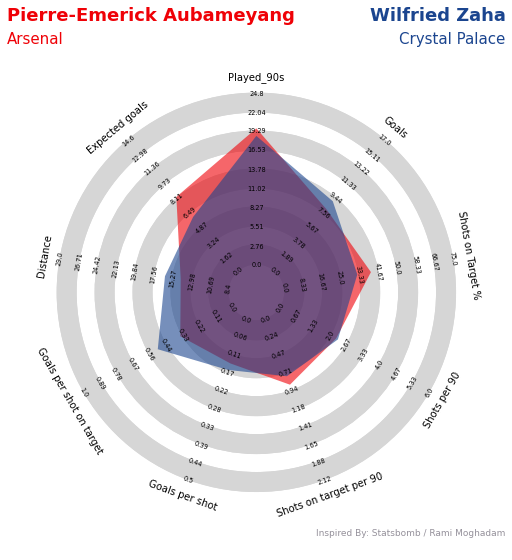

In [140]:
# plot the fwd radars

radar = Radar()
fig, ax = radar.plot_radar(ranges=fwd_ranges, params= params1,values=fwd_values,
                           title=fwd_title, radar_color=['#EF0107', '#1B458F'], compare = True, 
                           image = 'Arsenal.png')
plt.savefig('fwd_radar.png')

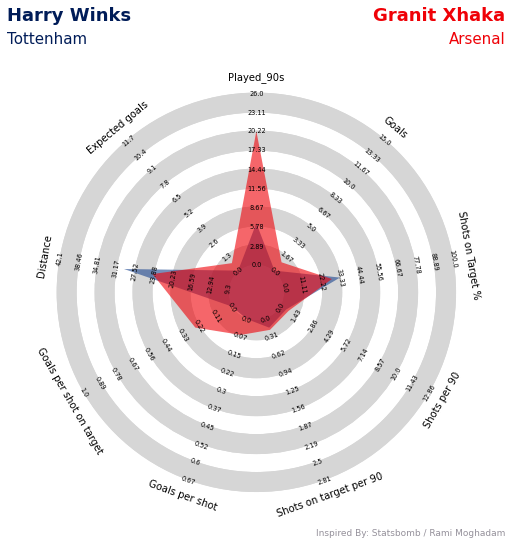

In [139]:
# plot mid radar

fig, ax = radar.plot_radar(ranges=mid_ranges, params= params1,values=mid_values,
                           title=mid_title, radar_color=['#1B458F','#EF0107'], compare = True)
plt.savefig('mid_radar.png')

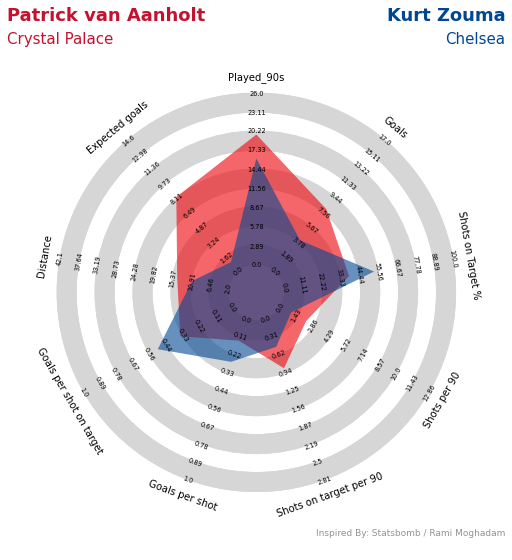

In [141]:
# plot defence radar

fig, ax = radar.plot_radar(ranges=ranges, params= params1,values=defence_values,
                           title=defence_title, radar_color=['#EF0107', '#004793'], compare = True)
plt.savefig('defence_radar.png')